# Week11 : Multilayer Perceptron

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week11_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week11\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Multilayer perceptron and backpropagation 
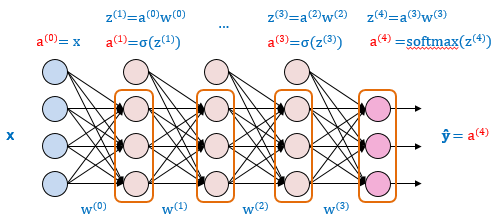

### Sigmoid activation function
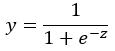

In [1]:
import numpy as np

# sigmoid function
def sigmoid(z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))  # np.clip - preventing overflow

In [2]:
# test sigmoid
z = np.array([[1.0, 0.0, -1.0],
              [-1.0, 0.0, 1.0]])

print("sigmoid of z = \n", sigmoid(z))

sigmoid of z = 
 [[0.73105858 0.5        0.26894142]
 [0.26894142 0.5        0.73105858]]


### Softmax function
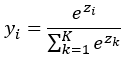

In [3]:
# softmax function for 2D array
def softmax(z):
    exps = np.exp(z)
    return None

In [4]:
# test softmax
z = np.array([[1.0, 0.0, -1.0],
              [-1.0, 0.0, 1.0]])

print("softmax of z = \n", softmax(z))
print("sum of softmax values = \n", np.sum(softmax(z), axis=1, keepdims=True))

softmax of z = 
 [[0.66524096 0.24472847 0.09003057]
 [0.09003057 0.24472847 0.66524096]]
sum of softmax values = 
 [[1.]
 [1.]]


### Example dataset

In [5]:
X = np.array([[0.5, 0.0, -0.5],
              [-0.5, 0.0, 0.5]])
y = np.array([[1, 0],
             [0, 1]])

### Example network
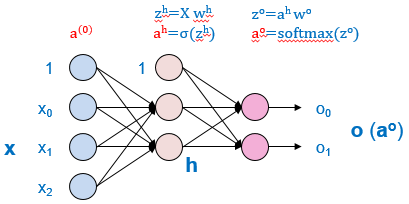

### Initial parameters

In [6]:
# weights and bias of hidden layer. w_h is (3, 2)
w_h = np.array([[1, -1], 
                [0, 0],
                [-1, 1]])
b_h = [0.0, 0.0]

# weights and bias of output layer. w_o is (2, 2)
w_o = np.array([[1, -1], 
                [-1, 1]])
b_o = [0.0, 0.0]

### Forward computation

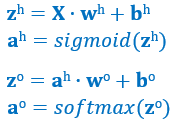

In [7]:
# input X
print(X)

[[ 0.5  0.  -0.5]
 [-0.5  0.   0.5]]


In [8]:
# output of hidden layer
z_h = None
a_h = None

print(z_h)
print(a_h)

[[ 1. -1.]
 [-1.  1.]]
[[0.73105858 0.26894142]
 [0.26894142 0.73105858]]


In [9]:
# output of output layer
z_o = None
a_o = None

print(z_o)
print(a_o)

[[ 0.46211716 -0.46211716]
 [-0.46211716  0.46211716]]
[[0.71590409 0.28409591]
 [0.28409591 0.71590409]]


In [10]:
np.argmax(a_o, axis=1)

array([0, 1], dtype=int64)

### Compute cost
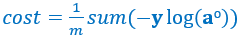

In [11]:
# cross entropy loss
cost = None

print(cost)

0.334208933408766


### Compute gradients
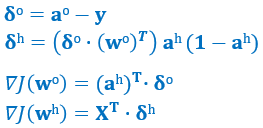

In [12]:
# compute delta of output layer and hidden layer
delta_o = None
delta_h = None

In [13]:
# compute gradient of output layer
grad_w_o = None 
grad_b_o = None 

print(grad_w_o)
print(grad_b_o)

[[-0.13128559  0.13128559]
 [ 0.13128559 -0.13128559]]
[0. 0.]


In [14]:
# compute gradient of hidden layer
grad_w_h = None
grad_b_h = None 

print(grad_w_h)
print(grad_b_h)

[[-0.11171329  0.11171329]
 [ 0.          0.        ]
 [ 0.11171329 -0.11171329]]
[0. 0.]


### Update parameters - gradient descent
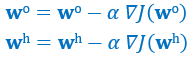

In [15]:
# learning rate
alpha = 0.1

# update parameters by gradient descent
w_o = None 
b_o = None

w_h = None
b_h = None

In [16]:
print(w_o)
print(b_o)
print(w_h)
print(b_h)

[[ 1.01312856 -1.01312856]
 [-1.01312856  1.01312856]]
[0. 0.]
[[ 1.01117133 -1.01117133]
 [ 0.          0.        ]
 [-1.01117133  1.01117133]]
[0. 0.]


---

# 2. Image Classification using Multilayer Perceptron

### The MNIST image dataset

In [17]:
import matplotlib.pyplot as plt
from scipy import io

# load the MNIST dataset
mnist = io.loadmat('mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [18]:
# get X and y
X = None
y = None

X = np.array(X).T
X.shape

(70000, 784)

In [19]:
y = np.array(y).T.ravel()
y.shape

(70000,)

In [20]:
# check data 0 (image 0)
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

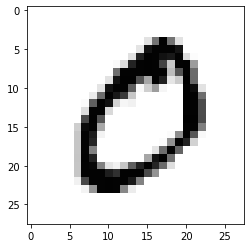

In [21]:
# show image 0
ex1 = X[0] 
ex1_image = None 
plt.imshow(ex1_image, cmap='Greys') 
plt.show()

In [22]:
# label of image 0
y[0]

0.0

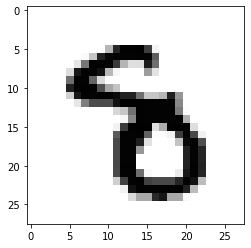

In [23]:
# show image 50000
ex1 = X[50000] 
ex1_image = None 
plt.imshow(ex1_image, cmap='Greys') 
plt.show()

In [24]:
# label of image 50000
y[50000]

8.0

In [25]:
# train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### One-hot encoding of class label

In [26]:
# function to encode class label to one-hot
# ex> 2 --> 0 0 1 0 0 0 0 0 0 0
def onehot(y, n_classes):

    # y is an array of labels
    # n_classes is number of different labels
    onehot = np.zeros((y.shape[0], n_classes))
    
    for idx, val in enumerate(y.astype(int)):
        onehot[idx, val] = 1.
    return onehot

In [27]:
# test onehot encoding
y = np.array([0, 1, 2, 0, 1, 2])
print(onehot(y, 3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Generating batchs for Stochastic Gradient Descent
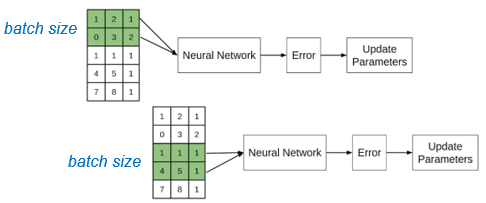

In [28]:
# total number of data and total index
n_data = X_train.shape[0]
indices = np.arange(n_data)

print("total number of data = ", n_data)
print("indices = ", indices)

total number of data =  60000
indices =  [    0     1     2 ... 59997 59998 59999]


In [29]:
# test generating batch training data of size 10000
batch_size = 10000

# for 0, 10000, 20000, ...
for start_idx in range(0, None, None):
    
    # each batch has 10000 data
    batch_idx = indices[None]
    print("indices =", batch_idx, "batch data shape = ", X_train[batch_idx].shape)

indices = [   0    1    2 ... 9997 9998 9999] batch data shape =  (10000, 784)
indices = [10000 10001 10002 ... 19997 19998 19999] batch data shape =  (10000, 784)
indices = [20000 20001 20002 ... 29997 29998 29999] batch data shape =  (10000, 784)
indices = [30000 30001 30002 ... 39997 39998 39999] batch data shape =  (10000, 784)
indices = [40000 40001 40002 ... 49997 49998 49999] batch data shape =  (10000, 784)
indices = [50000 50001 50002 ... 59997 59998 59999] batch data shape =  (10000, 784)


### The Multilayer Perceptron class
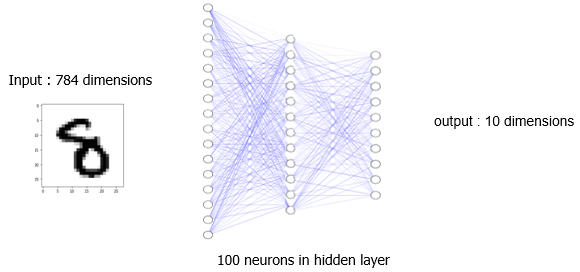

In [30]:
import sys

class NeuralNetMLP(object):
    '''
    This model has 1 hidden layer
    
    n_hidden :   number of hidden units
    epochs :     number of epoches
    alpha :      learning rate
    shuffle :    if True, shuffle the training data each epoch 
    batch_size : size of batch training set 
    seed :       seed for random generation
    
    z_h, a_h : z and output of hidden layer
    z_o, a_o : z and output of output layer
    
    n_samples :  number of total data 
    n_features : number of features of a data
    n_output :   numner of output (number of class labels)
    
    w_h, b_h : parameter of hidden layer. (n_features, n_hidden), (n_hidden)
    w_o, b_o : parameter of output layer. (n_hidden, n_output), (n_output)

    '''
    def __init__(self, n_hidden=100, epochs=100, alpha=0.01,
                 shuffle=True, batch_size=100, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.alpha = alpha
        self.shuffle = shuffle
        self.batch_size = batch_size

    # sigmoid function
    def _sigmoid(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))  # np.clip - preventing overflow

    # softmax function for 2D array
    def _softmax(self, z):
        exps = np.exp(z)
        return exps / np.sum(exps, axis=1, keepdims=True)

    # forward computation
    def _forward(self, X):

        # z and a of hidden layer. a = sigmoid(z)
        # (n_samples, n_features) dot (n_features, n_hidden) -> (n_samples, n_hidden)
        z_h = None
        a_h = None

        # z and a of output layer. a = softmax(z)
        # (n_samples, n_hidden) dot (n_hidden, n_output) -> (n_samples, n_output)
        z_o = None
        a_o = None

        return z_h, a_h, z_o, a_o

    # compute cost - cross entropy
    def _compute_cost(self, y_enc, output):

        # y_enc :  onehot endcoded y (n_samples, n_output (labels))
        # output : a_o of output layer (n_samples, n_output)
        cost = None  # output+1e-7 to prevent overflow
        
        return cost

    # predict class label
    def predict(self, X):

        # y_pred : index of max output (n_samples)
        z_h, a_h, z_o, a_o = self._forward(X)
        y_pred = None

        return y_pred

    # train the model
    def fit(self, X_train, y_train):

        # X_train : (n_samples, n_features)
        # y_train : (n_samples)
        self.n_samples = None
        self.n_features = None           
        self.n_output = np.unique(y_train).shape[0]  # number of class labels

        # initialize parameters
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(None, None))
        self.b_o = np.zeros(self.n_output)
        self.w_o = self.random.normal(loc=0.0, scale=0.1, size=(None, None))

        # one-hot encoding y_train
        y_train_enc = onehot(y_train, self.n_output)
        
        # print the dimension of model
        print("number of input  = ", self.n_features) 
        print("number of hidden = ", self.n_hidden)       
        print("number of output = ", self.n_output)  

        # record cost 
        self.history = []

        # gradient descent for total epochs     
        for i in range(self.epochs):

            indices = np.arange(self.n_samples)
            if self.shuffle:
                self.random.shuffle(indices)

            # for each batch
            for start_idx in range(0, indices.shape[0]-self.batch_size+1, self.batch_size):
                batch_idx = indices[start_idx:start_idx+self.batch_size]

                X = None
                y = None
                
                # forward computation
                z_h, a_h, z_o, a_o = None

                # compute deltas              
                delta_o = None                                        # [batch_size, n_output]
                delta_h = None # [batch_size, n_hidden]

                # compute gradients        
                grad_w_o = None      # [n_hidden, n_output]
                grad_b_o = None
                grad_w_h = np.dot(X.T, delta_h) / self.batch_size        # [n_features, n_hidden]
                grad_b_h = np.sum(delta_h, axis=0) / self.batch_size

                # update parameters
                self.w_o = None     # [n_hidden, n_output]
                self.b_o = None
                self.w_h = self.w_h - self.alpha * grad_w_h     # [n_features, n_hidden]
                self.b_h = self.b_h - self.alpha * grad_b_h

            # record costs every epoch
            z_h, a_h, z_o, a_o = self._forward(X_train)
            cost = self._compute_cost(y_train_enc, a_o)
            print('Iteration %5d: Cost %f ' % (i, cost))
            self.history.append(cost)

        return self

### Training MLP

In [31]:
# multilayer perceptron with 1 hidden layer, 100 hidden units.
# stochastic gradient descent with batch size 100. learning rate = 0.01, epochs = 100

nn = None

In [32]:
# train the network with 60000 training data
None

number of input  =  784
number of hidden =  100
number of output =  10
Iteration     0: Cost 1.003301 
Iteration     1: Cost 0.678887 
Iteration     2: Cost 0.545278 
Iteration     3: Cost 0.475429 
Iteration     4: Cost 0.427215 
Iteration     5: Cost 0.391475 
Iteration     6: Cost 0.364307 
Iteration     7: Cost 0.340373 
Iteration     8: Cost 0.331018 
Iteration     9: Cost 0.313169 
Iteration    10: Cost 0.302126 
Iteration    11: Cost 0.289829 
Iteration    12: Cost 0.282312 
Iteration    13: Cost 0.274791 
Iteration    14: Cost 0.270024 
Iteration    15: Cost 0.261128 
Iteration    16: Cost 0.252893 
Iteration    17: Cost 0.247832 
Iteration    18: Cost 0.242523 
Iteration    19: Cost 0.235945 
Iteration    20: Cost 0.233016 
Iteration    21: Cost 0.229360 
Iteration    22: Cost 0.224466 
Iteration    23: Cost 0.220540 
Iteration    24: Cost 0.214813 
Iteration    25: Cost 0.212168 
Iteration    26: Cost 0.209461 
Iteration    27: Cost 0.207210 
Iteration    28: Cost 0.206466 
I

### Number of parameters

In [33]:
# check the total number of parameters
print("shape of w_h = ", nn.w_h.shape)
print("shape of b_h = ", nn.b_h.shape)
print("shape of w_o = ", nn.w_o.shape)
print("shape of b_o = ", nn.b_o.shape)
print("total number of parameters = ", None)

shape of w_h =  (784, 100)
shape of b_h =  (100,)
shape of w_o =  (100, 10)
shape of b_o =  (10,)
total number of parameters =  79510


### Plot the cost change

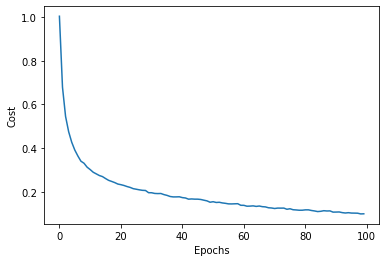

In [34]:
import matplotlib.pyplot as plt

# plot the loss - history
None

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

### Accuracy of the model

In [35]:
# training accuracy
y_train_pred = None
acc = None

print('train 정확도: %.2f%%' % (acc * 100))

# test accuracy
y_test_pred = None
acc = None

print('test 정확도: %.2f%%' % (acc * 100))

train 정확도: 97.26%
test 정확도: 95.55%


### Classification test

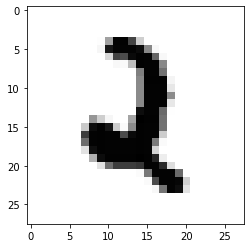

In [36]:
# show image 63000

ex = X[63000]
ex_image = ex.reshape(28, 28)
plt.imshow(ex_image, cmap='Greys')
plt.show()

In [37]:
# classification - predict label of image 63000
pred = None
print("The image is number : ", pred[0])

The image is number :  2


### Examples of incorrect classification

total 445 images are incorrectly classified
samples(t:true label, p:predicted label):


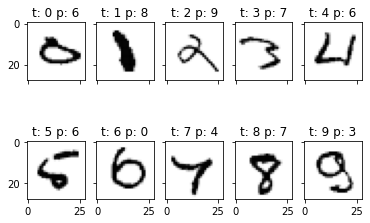

In [45]:
# check the incorrect results
mistake_img = X_test[y_test != y_test_pred]
true_lab = y_test[y_test != y_test_pred]
pred_lab = y_test_pred[y_test != y_test_pred]

print("total %d images are incorrectly classified" % mistake_img.shape[0])
print("samples(t:true label, p:predicted label):") 

# show the misclassified image examples
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = mistake_img[true_lab == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[i].set_title('t: %d p: %d' % (true_lab[true_lab == i][0], pred_lab[true_lab == i][0]))

plt.show()

---


# 3. Multilayer perceptron using scikit learn

### Standardize data

In [38]:
from sklearn.preprocessing import StandardScaler

# standardize data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [39]:
y_train.shape

(60000,)

### Train MLPClassifier

In [40]:
from sklearn.neural_network import MLPClassifier

# Multilayer perceptron from scikit learn with 1 hidden layer, 100 hidden units
# stochastic gradient descent with batch size 100. learning rate = 0.01, L2 regularization parameter = 1e-1, 
mlp = None

None

Iteration 1, loss = 0.41689056
Iteration 2, loss = 0.25026337
Iteration 3, loss = 0.20809725
Iteration 4, loss = 0.18444219
Iteration 5, loss = 0.16713313
Iteration 6, loss = 0.15427066
Iteration 7, loss = 0.14313532
Iteration 8, loss = 0.13586182
Iteration 9, loss = 0.12837024
Iteration 10, loss = 0.12232528
Iteration 11, loss = 0.11778416
Iteration 12, loss = 0.11328087
Iteration 13, loss = 0.10974739
Iteration 14, loss = 0.10637758
Iteration 15, loss = 0.10370598
Iteration 16, loss = 0.10095428
Iteration 17, loss = 0.09835926
Iteration 18, loss = 0.09663742
Iteration 19, loss = 0.09553043
Iteration 20, loss = 0.09343205
Iteration 21, loss = 0.09240505
Iteration 22, loss = 0.09081009
Iteration 23, loss = 0.09006995
Iteration 24, loss = 0.08928516
Iteration 25, loss = 0.08832028
Iteration 26, loss = 0.08784616
Iteration 27, loss = 0.08727906
Iteration 28, loss = 0.08623176
Iteration 29, loss = 0.08509248
Iteration 30, loss = 0.08503916
Iteration 31, loss = 0.08472869
Iteration 32, los

MLPClassifier(alpha=0.1, batch_size=100, hidden_layer_sizes=100,
              learning_rate_init=0.01, max_iter=100, random_state=0,
              solver='sgd', verbose=10)

### Plot the cost change

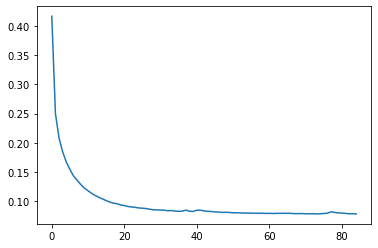

In [41]:
# plot the loss. use loss_curve_
None
plt.show()

### Accuracy of the model

In [42]:
# Train and test accuracy
acc = None
print("Train accuracy : %.4f" % acc)
acc = None
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9978
Train accuracy : 0.9780


### Classification test

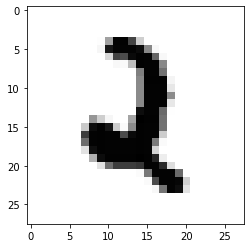

In [43]:
# show image 63000
ex = X[63000]
ex_image = ex.reshape(28, 28)
plt.imshow(ex_image, cmap='Greys')
plt.show()

In [44]:
# classification - predict label of image 63000
pred = None
print("The image is number : ", pred[0])

The image is number :  2


### Number of parameters

In [47]:
# check the total number of parameters
# parameters are mlp.coefs_ and mlp.intercepts_
print("shape of w[0] ", mlp.coefs_[0].shape)
print("shape of b[0] ", mlp.intercepts_[0].shape)
print("shape of w[1] ", mlp.coefs_[1].shape)
print("shape of b[1] ", mlp.intercepts_[1].shape)
print("total number of parameters = ", None)

shape of w[0]  (784, 100)
shape of b[0]  (100,)
shape of w[1]  (100, 10)
shape of b[1]  (10,)
total number of parameters =  79510


### Visualize parameters

In [46]:
# weights of hidden layer
mlp.coefs_[0].shape

(784, 100)

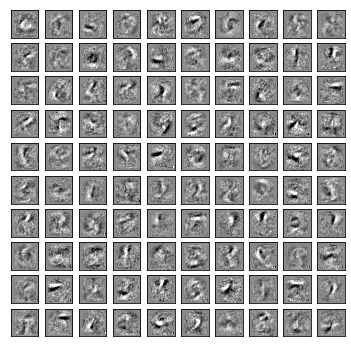

In [48]:
# display weights of hidden layer (784, 100)

fig, axes = plt.subplots(10, 10, figsize=(6, 6))
plt.figsize = 20

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [49]:
# weights of output layer
mlp.coefs_[1].shape

(100, 10)

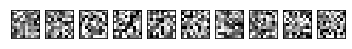

In [50]:
# display weights of output layer (100, 10)
fig, axes = plt.subplots(1, 10)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(10, 10), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

---

# Quiz 1 : Learning Nonlinear Decision Boundary
## Train multilayer perceptron with the following moon dataset
- Use the NeuraNetMLP with 100 neurons in hidden layer, learning rate 0.1, batch size 10

1. Train the model up to 1000 epochs 
2. Plot the cost change during training
3. Show the decision boundary 

- Repeat above using the MLPClassifier in scikit learn with 100 neurons each in 2 hidden layer, learning rate 0.01

### Dataset

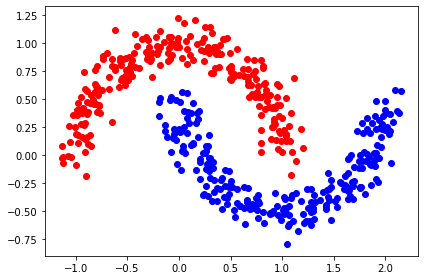

In [51]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.1, random_state=0)

plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.tight_layout()

plt.show()

### Training MLP

In [52]:
nn = None
None

number of input  =  2
number of hidden =  100
number of output =  2
Iteration     0: Cost 0.706873 
Iteration     1: Cost 0.526284 
Iteration     2: Cost 0.421231 
Iteration     3: Cost 0.390352 
Iteration     4: Cost 0.343257 
Iteration     5: Cost 0.333388 
Iteration     6: Cost 0.313195 
Iteration     7: Cost 0.334875 
Iteration     8: Cost 0.292701 
Iteration     9: Cost 0.300982 
Iteration    10: Cost 0.279281 
Iteration    11: Cost 0.305351 
Iteration    12: Cost 0.269271 
Iteration    13: Cost 0.291806 
Iteration    14: Cost 0.268628 
Iteration    15: Cost 0.318180 
Iteration    16: Cost 0.261627 
Iteration    17: Cost 0.266763 
Iteration    18: Cost 0.304177 
Iteration    19: Cost 0.263069 
Iteration    20: Cost 0.259577 
Iteration    21: Cost 0.261148 
Iteration    22: Cost 0.267490 
Iteration    23: Cost 0.273016 
Iteration    24: Cost 0.260017 
Iteration    25: Cost 0.258877 
Iteration    26: Cost 0.262971 
Iteration    27: Cost 0.279397 
Iteration    28: Cost 0.269703 
Iter

Iteration   258: Cost 0.261254 
Iteration   259: Cost 0.263607 
Iteration   260: Cost 0.264762 
Iteration   261: Cost 0.259347 
Iteration   262: Cost 0.287488 
Iteration   263: Cost 0.263379 
Iteration   264: Cost 0.259979 
Iteration   265: Cost 0.258861 
Iteration   266: Cost 0.259332 
Iteration   267: Cost 0.270629 
Iteration   268: Cost 0.264361 
Iteration   269: Cost 0.259346 
Iteration   270: Cost 0.262782 
Iteration   271: Cost 0.259106 
Iteration   272: Cost 0.265422 
Iteration   273: Cost 0.261720 
Iteration   274: Cost 0.268900 
Iteration   275: Cost 0.258846 
Iteration   276: Cost 0.284011 
Iteration   277: Cost 0.258679 
Iteration   278: Cost 0.261090 
Iteration   279: Cost 0.260848 
Iteration   280: Cost 0.267003 
Iteration   281: Cost 0.260256 
Iteration   282: Cost 0.265091 
Iteration   283: Cost 0.276448 
Iteration   284: Cost 0.262988 
Iteration   285: Cost 0.273146 
Iteration   286: Cost 0.259105 
Iteration   287: Cost 0.271235 
Iteration   288: Cost 0.258732 
Iteratio

Iteration   525: Cost 0.074105 
Iteration   526: Cost 0.072943 
Iteration   527: Cost 0.072365 
Iteration   528: Cost 0.071708 
Iteration   529: Cost 0.070474 
Iteration   530: Cost 0.069787 
Iteration   531: Cost 0.068916 
Iteration   532: Cost 0.070324 
Iteration   533: Cost 0.067480 
Iteration   534: Cost 0.066996 
Iteration   535: Cost 0.067191 
Iteration   536: Cost 0.066526 
Iteration   537: Cost 0.065000 
Iteration   538: Cost 0.064517 
Iteration   539: Cost 0.063495 
Iteration   540: Cost 0.065866 
Iteration   541: Cost 0.062687 
Iteration   542: Cost 0.061657 
Iteration   543: Cost 0.061097 
Iteration   544: Cost 0.060570 
Iteration   545: Cost 0.062158 
Iteration   546: Cost 0.060028 
Iteration   547: Cost 0.060830 
Iteration   548: Cost 0.058541 
Iteration   549: Cost 0.058095 
Iteration   550: Cost 0.059528 
Iteration   551: Cost 0.057560 
Iteration   552: Cost 0.056468 
Iteration   553: Cost 0.059003 
Iteration   554: Cost 0.055523 
Iteration   555: Cost 0.055842 
Iteratio

Iteration   786: Cost 0.021786 
Iteration   787: Cost 0.021652 
Iteration   788: Cost 0.021729 
Iteration   789: Cost 0.021818 
Iteration   790: Cost 0.021461 
Iteration   791: Cost 0.021408 
Iteration   792: Cost 0.021356 
Iteration   793: Cost 0.021619 
Iteration   794: Cost 0.021240 
Iteration   795: Cost 0.021208 
Iteration   796: Cost 0.021264 
Iteration   797: Cost 0.021096 
Iteration   798: Cost 0.021072 
Iteration   799: Cost 0.021787 
Iteration   800: Cost 0.020959 
Iteration   801: Cost 0.020999 
Iteration   802: Cost 0.021144 
Iteration   803: Cost 0.020855 
Iteration   804: Cost 0.021009 
Iteration   805: Cost 0.020747 
Iteration   806: Cost 0.020666 
Iteration   807: Cost 0.021135 
Iteration   808: Cost 0.020581 
Iteration   809: Cost 0.020532 
Iteration   810: Cost 0.020768 
Iteration   811: Cost 0.020546 
Iteration   812: Cost 0.020510 
Iteration   813: Cost 0.020465 
Iteration   814: Cost 0.020588 
Iteration   815: Cost 0.020344 
Iteration   816: Cost 0.020212 
Iteratio

### Plot the cost change

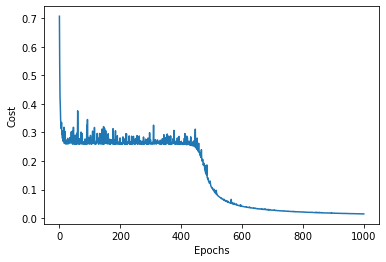

In [53]:
import matplotlib.pyplot as plt

None

plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

### Plot the decision boundary

In [54]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

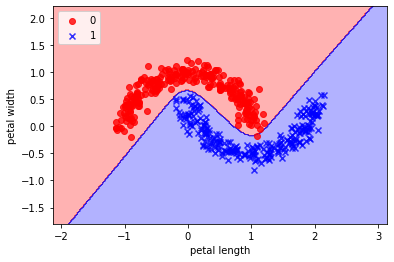

In [55]:
# plot decision boundary of the model 
None

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

### Training scikit learn MLPClassifier

In [56]:
from sklearn.neural_network import MLPClassifier

mlp = None
None

Iteration 1, loss = 0.68638631
Iteration 2, loss = 0.67412337
Iteration 3, loss = 0.65612239
Iteration 4, loss = 0.63577343
Iteration 5, loss = 0.61363586
Iteration 6, loss = 0.59085751
Iteration 7, loss = 0.56849187
Iteration 8, loss = 0.54620165
Iteration 9, loss = 0.52419985
Iteration 10, loss = 0.50303243
Iteration 11, loss = 0.48230069
Iteration 12, loss = 0.46261200
Iteration 13, loss = 0.44373352
Iteration 14, loss = 0.42555398
Iteration 15, loss = 0.40917172
Iteration 16, loss = 0.39356959
Iteration 17, loss = 0.38009799
Iteration 18, loss = 0.36763780
Iteration 19, loss = 0.35643458
Iteration 20, loss = 0.34636153
Iteration 21, loss = 0.33746254
Iteration 22, loss = 0.32889278
Iteration 23, loss = 0.32147256
Iteration 24, loss = 0.31485476
Iteration 25, loss = 0.30846778
Iteration 26, loss = 0.30254339
Iteration 27, loss = 0.29736602
Iteration 28, loss = 0.29234218
Iteration 29, loss = 0.28764119
Iteration 30, loss = 0.28342652
Iteration 31, loss = 0.27922445
Iteration 32, los

Iteration 331, loss = 0.02084015
Iteration 332, loss = 0.02070063
Iteration 333, loss = 0.02057292
Iteration 334, loss = 0.02048105
Iteration 335, loss = 0.02033480
Iteration 336, loss = 0.02020452
Iteration 337, loss = 0.02010853
Iteration 338, loss = 0.02000349
Iteration 339, loss = 0.01986784
Iteration 340, loss = 0.01975998
Iteration 341, loss = 0.01963795
Iteration 342, loss = 0.01956331
Iteration 343, loss = 0.01944035
Iteration 344, loss = 0.01935272
Iteration 345, loss = 0.01924468
Iteration 346, loss = 0.01919674
Iteration 347, loss = 0.01906321
Iteration 348, loss = 0.01897222
Iteration 349, loss = 0.01891405
Iteration 350, loss = 0.01879020
Iteration 351, loss = 0.01868349
Iteration 352, loss = 0.01851653
Iteration 353, loss = 0.01846123
Iteration 354, loss = 0.01837644
Iteration 355, loss = 0.01827596
Iteration 356, loss = 0.01814103
Iteration 357, loss = 0.01805101
Iteration 358, loss = 0.01796370
Iteration 359, loss = 0.01788139
Iteration 360, loss = 0.01779407
Iteration 

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100),
              learning_rate_init=0.01, max_iter=1000, random_state=0,
              solver='sgd', verbose=10)

### Plot the cost change

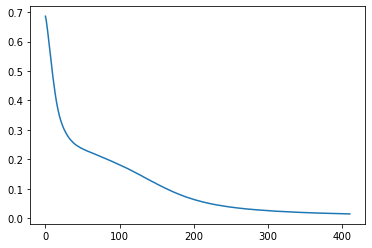

In [57]:
# plot the loss
None
plt.show()

### Plot the decision boundary

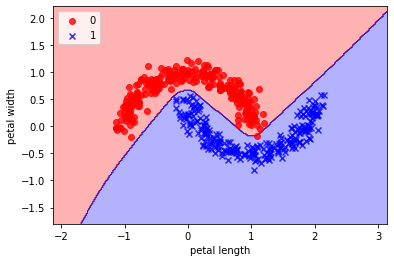

In [58]:
# plot decision boundary of the model 
None

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

---

# Quiz 2 : Image Classification  
## Train multilayer perceptron with the Fashion MNIST dataset
- Use the MLPClassifier in scikit learn with 128 neurons each in 2 hidden layer

1. Import tensorflow as tf, and load the Fashion MNIST dataset using tf.keras.datasets.fashion_mnist.load_data()
2. Train the model up to 50 epochs using X_train
3. Plot the cost change during training
4. Show the train and test accuracies 
5. Show the classification result of the test data X_test[3]

### Load and prepare the Fashion MNIST dataset

In [59]:
import tensorflow as tf

# read fashion MNIST data 
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# shape of X_train 
X_train.shape

(60000, 28, 28)

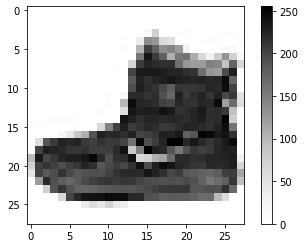

In [60]:
# show the image data 0
None
plt.colorbar()
plt.show()

In [61]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0

In [62]:
# class labels (y_train)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Show first 25 images and labels

In [63]:
# names for class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# name of the class label of train data 0
class_names[y_train[0]]

'Ankle boot'

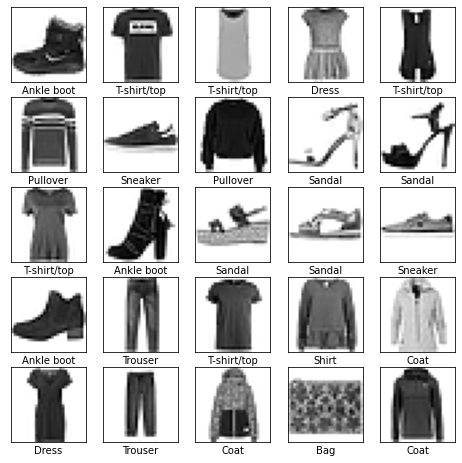

In [64]:
# show first 25 data and label
plt.figure(figsize=(8,8))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(None, cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Train the model

In [65]:
from sklearn.neural_network import MLPClassifier

# build the model with 2 hidden layers, 128 units each, max iteration 50
mlp = None

In [66]:
# flatten the data
X_train_1d = X_train.reshape(60000, 784)
X_test_1d = X_test.reshape(10000, 784)

In [67]:
# checking the execution time
import time
start_time = time.time()

# training the model
None

print("Time : ", time.time()-start_time)

Iteration 1, loss = 0.55645299
Iteration 2, loss = 0.39674814
Iteration 3, loss = 0.35206005
Iteration 4, loss = 0.32335400
Iteration 5, loss = 0.30622575
Iteration 6, loss = 0.29004210
Iteration 7, loss = 0.27561103
Iteration 8, loss = 0.26541692
Iteration 9, loss = 0.25696521
Iteration 10, loss = 0.24717210
Iteration 11, loss = 0.23872071
Iteration 12, loss = 0.22663507
Iteration 13, loss = 0.22229734
Iteration 14, loss = 0.21481390
Iteration 15, loss = 0.21088833
Iteration 16, loss = 0.20530210
Iteration 17, loss = 0.19528614
Iteration 18, loss = 0.19084128
Iteration 19, loss = 0.18524678
Iteration 20, loss = 0.18267485
Iteration 21, loss = 0.17578112
Iteration 22, loss = 0.17292266
Iteration 23, loss = 0.16521429
Iteration 24, loss = 0.16189670
Iteration 25, loss = 0.15376023
Iteration 26, loss = 0.15568037
Iteration 27, loss = 0.15147741
Iteration 28, loss = 0.13891280
Iteration 29, loss = 0.14083972
Iteration 30, loss = 0.13635171
Iteration 31, loss = 0.13054728
Iteration 32, los

C:\Users\win\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


### Plot the cost change

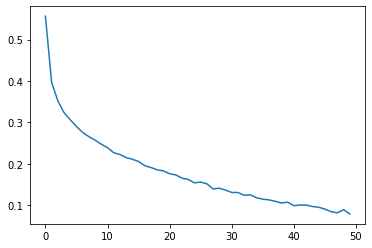

In [68]:
# plot the loss
None
plt.show()

### Accuracy of the model

In [69]:
# Train and test accuracy
acc = None
print("Train accuracy : %.4f" % acc)
acc = None
print("Train accuracy : %.4f" % acc)

Train accuracy : 0.9655
Train accuracy : 0.8888


### Classification test

In [70]:
# prediction of all test data
predictions = None

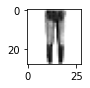

In [71]:
# show the image of test data 3
plt.figure(figsize=(1, 1))
plt.imshow(None, cmap=plt.cm.binary)
plt.show()

In [72]:
# show the true class name and the predicted class name of test data 3
print('True lable = %s' % None)
print('Predicted = %s' % None)

True lable = Trouser
Predicted = Trouser
